In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [6]:
iris=datasets.load_iris()
# #IRIS dataset can be imported from below url
# url= "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# df = pd.read_csv(url
#     ,names=['sepal length','sepal width','petal length','petal width','target'])
# df.head()

In [7]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [49]:
sc=StandardScaler()  
X=sc.fit_transform(iris.data) 

In [68]:

df=pd.DataFrame( iris.data)
target=pd.DataFrame(iris.target)
target.columns=['target']

In [69]:
target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [47]:
df.columns

RangeIndex(start=0, stop=4, step=1)

In [33]:
# col=df.columns
# features=col.tolist() 
# feature=features[:-1] 
# target=features[-1]
# X=df.loc[:,feature].values  
# y=df.loc[:,target].values


,0,1,2
0,-0.900681,1.019004,-1.340227
1,-1.143017,-0.131979,-1.340227
2,-1.385353,0.328414,-1.397064
3,-1.506521,0.098217,-1.283389
4,-1.021849,1.249201,-1.340227


In [ ]:
#Apply Standard Scaling
# sc=StandardScaler()  
# X=sc.fit_transform(df) 
# pd.DataFrame(X,columns=feature).head()

#  PCA with Two Components

In [52]:
#Define two components  
pca=PCA(n_components=2) 
principalComponents=pca.fit_transform(X) 
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2']) 
principalDf.head()

,principal component 1,principal component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [53]:
finalDf=pd.concat([principalDf,target],axis=1)
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


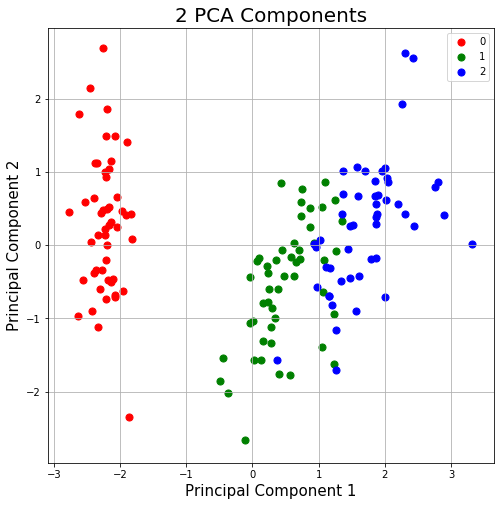

In [72]:
fig=plt.figure(figsize=(8,8))  
ax=fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1',fontsize = 15)  
ax.set_ylabel('Principal Component 2',fontsize = 15)  
ax.set_title('2 PCA Components',fontsize=20)  
targets=[0,1,2] 
colors=['r','g','b']  
for i,color in zip(targets,colors):    
    indicesToKeep = finalDf['target'] == i  
    ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'],
             finalDf.loc[indicesToKeep,'principal component 2'],
            c=color,
            s=50)
ax.legend(targets)  
ax.grid()

In [55]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

[PCA. concept](https://youtu.be/xebPVQ1f7nM)

In [65]:
df.columns=iris.feature_names

In [75]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [74]:
df.columns=iris.feature_names

In [76]:
df.keys()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [89]:
pca=PCA()
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [90]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [92]:
mean=pca.mean_
mean

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [94]:
pc1,pc2=np.split(pca.components_.T,2,axis=1)
pc1

array([[ 0.36138659,  0.65658877],
       [-0.08452251,  0.73016143],
       [ 0.85667061, -0.17337266],
       [ 0.3582892 , -0.07548102]])

In [95]:
pc2

array([[-0.58202985, -0.31548719],
       [ 0.59791083,  0.3197231 ],
       [ 0.07623608,  0.47983899],
       [ 0.54583143, -0.75365743]])

In [96]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [97]:
np.dot(pc1.T, pc2)

array([[ 8.10788185e-17, -2.68032824e-17],
       [-3.14125739e-16,  2.04075733e-17]])

In [99]:
l1,l2=pca.singular_values_ /10
ax=data.plot.scatter(x=0,y=1, s=15, c=dot_color,  title=" P .c. vector")
ax.set_aspect("equal")
origin_x, origin_y=pca.mean_
dx1, dy1=np.squeeze(pca.T)*l1
dx2, dy2=np.squeeze(pca.T)*l2

pc1_arrow=ax.arrow(origin_x, origin_y, dx1, dy1,color=pc1_color, width=.3)
pc2_arrow=ax.arrow(origin_x, origin_y, dx2, dy2,color=pc2_color, width=.3)

plt.legend([pc1_arrow, pc2_arrow], ['Principal Component 1', 'Principal Component 2'], fontsize='x-small')
plt.tight_ayout()

ValueError: too many values to unpack (expected 2)